## Data Load

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [2]:
from PIL import Image 
import glob
import os

In [3]:
# 사이즈 변경
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일 사이즈로 바꾸어 저장
	target_size=(64,64)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper/all/all_scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper/all/all_rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper/all/all_paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료")


1117  images to be resized.
1117  images resized.
가위 이미지 resize 완료
1288  images to be resized.
1288  images resized.
바위 이미지 resize 완료
1271  images to be resized.
1271  images resized.
보 이미지 resize 완료


In [4]:
# 데이터 라벨링 및 분리
import numpy as np

def load_data(img_path, number_of_data=3676):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=64
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/all_scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/all_rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/all_paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper/all"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3676 입니다.
x_train shape: (3676, 64, 64, 3)
y_train shape: (3676,)


라벨:  1


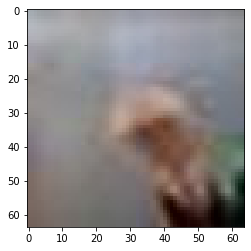

In [5]:
# 라벨링 확인
import matplotlib.pyplot as plt

plt.imshow(x_train[1230])
print('라벨: ', y_train[1230])

## Baseline

In [6]:
# modeling
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                200736    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

Epoch 1/10
115/115 [==============================] - 15s 112ms/step - loss: 8.0816 - accuracy: 0.6730
Epoch 2/10
115/115 [==============================] - 13s 113ms/step - loss: 0.1728 - accuracy: 0.9415
Epoch 3/10
115/115 [==============================] - 13s 112ms/step - loss: 0.0678 - accuracy: 0.9782
Epoch 4/10
115/115 [==============================] - 13s 112ms/step - loss: 0.0247 - accuracy: 0.9951
Epoch 5/10
115/115 [==============================] - 13s 112ms/step - loss: 0.0774 - accuracy: 0.9755
Epoch 6/10
115/115 [==============================] - 13s 113ms/step - loss: 0.0150 - accuracy: 0.9959
Epoch 7/10
115/115 [==============================] - 13s 112ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 8/10
115/115 [==============================] - 13s 111ms/step - loss: 7.8554e-04 - accuracy: 1.0000
Epoch 9/10
115/115 [==============================] - 13s 111ms/step - loss: 4.6542e-04 - accuracy: 1.0000
Epoch 10/10
115/115 [==============================] - 13s 111ms/

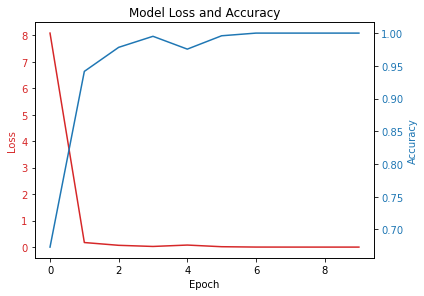

In [7]:
import matplotlib.pyplot as plt

# 모델 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련, 훈련 과정의 정보를 history에 저장
history = model.fit(x_train, y_train, epochs=n_train_epoch)

# 시각화
fig, ax1 = plt.subplots() 

color = 'tab:red' 
ax1.set_xlabel('Epoch') 
ax1.set_ylabel('Loss', color=color) 
ax1.plot(history.history['loss'], color=color) 
ax1.tick_params(axis='y', labelcolor=color) 

ax2 = ax1.twinx()  
color = 'tab:blue' 
ax2.set_ylabel('Accuracy', color=color) 
ax2.plot(history.history['accuracy'], color=color) 
ax2.tick_params(axis='y', labelcolor=color) 

fig.tight_layout() 
plt.title('Model Loss and Accuracy')
plt.show() # 그래프 표시

In [8]:
# test data
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

def test_load_data(img_path, number_of_data=1958):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=64
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

(x_test, y_test)=test_load_data(image_dir_path)

x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

635  images to be resized.
635  images resized.
675  images to be resized.
675  images resized.
648  images to be resized.
648  images resized.
학습데이터(x_train)의 이미지 개수는 1958 입니다.
x_test shape: (1958, 64, 64, 3)
y_test shape: (1958,)


In [9]:
# 결과 저장
test_losses = []
test_accuracies = []

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
test_losses.append(test_loss)
test_accuracies.append(test_accuracy)
    
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

62/62 - 2s - loss: 5.1192 - accuracy: 0.3555
test_loss: 5.1192402839660645 
test_accuracy: 0.35546475648880005


In [10]:
# 결과 값 탐색
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test 탐색 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [7.9043591e-13 1.0000000e+00 2.0493829e-19]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


예측확률분포: [1.5149988e-08 1.0000000e+00 1.5378276e-14]
라벨: 2, 예측결과: 1


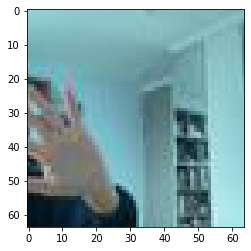

예측확률분포: [0.90887123 0.07779867 0.01333013]
라벨: 2, 예측결과: 0


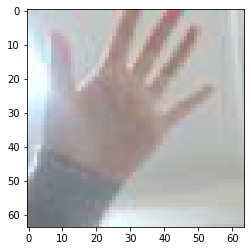

예측확률분포: [4.6646673e-02 9.5334637e-01 6.9149532e-06]
라벨: 0, 예측결과: 1


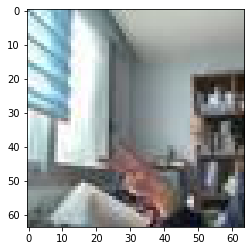

예측확률분포: [2.7929887e-05 5.6313772e-02 9.4365829e-01]
라벨: 1, 예측결과: 2


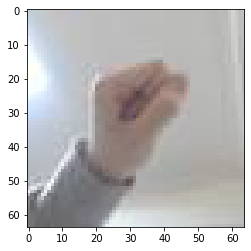

예측확률분포: [0.835266   0.0054202  0.15931389]
라벨: 1, 예측결과: 0


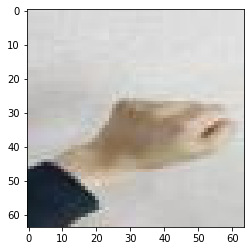

예측확률분포: [0.86083174 0.06808285 0.07108538]
라벨: 2, 예측결과: 0


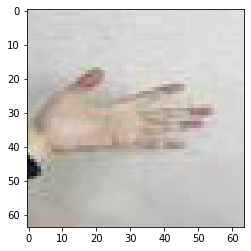

예측확률분포: [0.02723438 0.09093308 0.8818325 ]
라벨: 0, 예측결과: 2


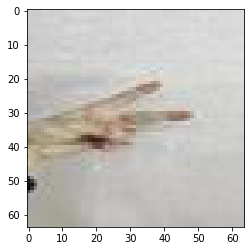

예측확률분포: [0.44273782 0.5156104  0.04165184]
라벨: 2, 예측결과: 1


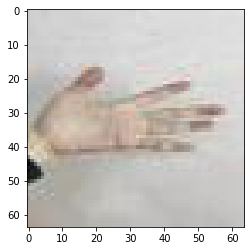

예측확률분포: [1.6428606e-07 7.1517377e-08 9.9999976e-01]
라벨: 1, 예측결과: 2


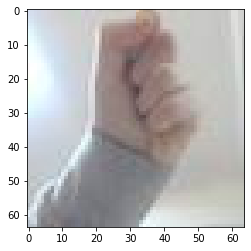

예측확률분포: [3.34307799e-07 1.05432555e-05 9.99989152e-01]
라벨: 1, 예측결과: 2


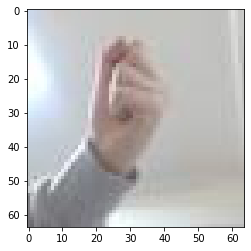

In [11]:
# 오답 확인
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우 append 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개 출력
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

학습시 Epoch 2에서 급격하게 accuracy가 1에 가까워졌으며 test_accuracy는 0.35로 낮은 점수로 확인되어 과적합이 의심됩니다.

## Tuning

### attempt #1 
- Dropout : 0.25, 0.5로 Dense layers에 더 높게 설정
- Early Stopping : 3 epochs 동안 개선되지 않으면 자동 종료


In [12]:
# modeling
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10


model = keras.models.Sequential([
    keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.25),  # 드롭아웃 추가
    keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),  # 드롭아웃 추가
    keras.layers.Flatten(),
    keras.layers.Dense(n_dense, activation='relu'),
    keras.layers.Dropout(0.5),  # 드롭아웃 추가
    keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

Epoch 1/10
115/115 [==============================] - 14s 119ms/step - loss: 3.3435 - accuracy: 0.3441
Epoch 2/10
115/115 [==============================] - 14s 118ms/step - loss: 1.0977 - accuracy: 0.3504
Epoch 3/10
115/115 [==============================] - 14s 118ms/step - loss: 1.0972 - accuracy: 0.3449
Epoch 4/10
115/115 [==============================] - 14s 119ms/step - loss: 1.0970 - accuracy: 0.3504
Epoch 5/10
115/115 [==============================] - 14s 118ms/step - loss: 1.0969 - accuracy: 0.3411
Epoch 6/10
115/115 [==============================] - 13s 118ms/step - loss: 1.0967 - accuracy: 0.3439
Epoch 7/10
115/115 [==============================] - 14s 118ms/step - loss: 1.0967 - accuracy: 0.3504
Epoch 8/10
115/115 [==============================] - 14s 118ms/step - loss: 1.0967 - accuracy: 0.3504
Epoch 9/10
115/115 [==============================] - 14s 118ms/step - loss: 1.0967 - accuracy: 0.3504
Epoch 10/10
115/115 [==============================] - 14s 119ms/step - l

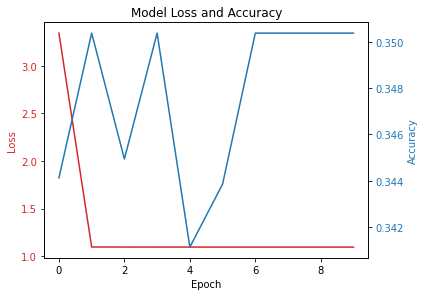

In [13]:
# 모델 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Early Stopping 콜백 설정
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 모델 훈련, 훈련 과정의 정보를 history에 저장
history = model.fit(x_train, y_train, epochs=n_train_epoch)

# 시각화
fig, ax1 = plt.subplots() 

color = 'tab:red' 
ax1.set_xlabel('Epoch') 
ax1.set_ylabel('Loss', color=color) 
ax1.plot(history.history['loss'], color=color) 
ax1.tick_params(axis='y', labelcolor=color) 

ax2 = ax1.twinx()  
color = 'tab:blue' 
ax2.set_ylabel('Accuracy', color=color) 
ax2.plot(history.history['accuracy'], color=color) 
ax2.tick_params(axis='y', labelcolor=color) 

fig.tight_layout() 
plt.title('Model Loss and Accuracy')
plt.show() 

In [14]:
# 결과 저장

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
test_losses.append(test_loss)
test_accuracies.append(test_accuracy)

print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

62/62 - 2s - loss: 1.0992 - accuracy: 0.3447
test_loss: 1.0991584062576294 
test_accuracy: 0.34473952651023865


In [15]:
# 결과 값 탐색
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test 탐색 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.3055437  0.35007554 0.3443807 ]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


예측확률분포: [0.3055437  0.35007554 0.3443807 ]
라벨: 2, 예측결과: 1


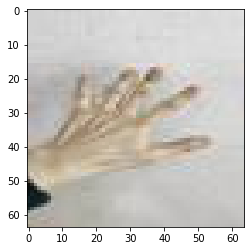

예측확률분포: [0.3055437  0.35007554 0.3443807 ]
라벨: 2, 예측결과: 1


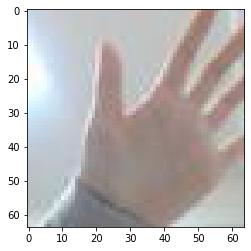

예측확률분포: [0.3055437  0.35007554 0.3443807 ]
라벨: 2, 예측결과: 1


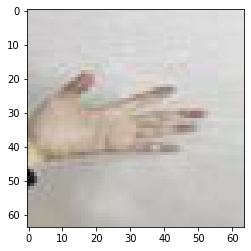

예측확률분포: [0.3055437  0.35007554 0.3443807 ]
라벨: 2, 예측결과: 1


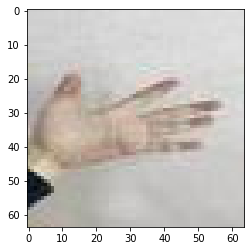

예측확률분포: [0.3055437  0.35007554 0.3443807 ]
라벨: 2, 예측결과: 1


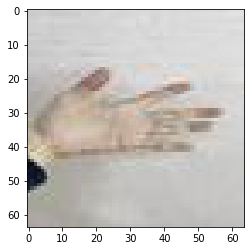

예측확률분포: [0.3055437  0.35007554 0.3443807 ]
라벨: 2, 예측결과: 1


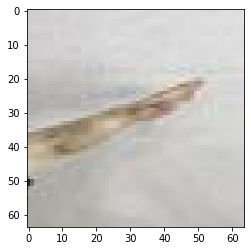

예측확률분포: [0.3055437  0.35007554 0.3443807 ]
라벨: 2, 예측결과: 1


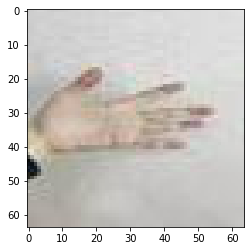

예측확률분포: [0.3055437  0.35007554 0.3443807 ]
라벨: 2, 예측결과: 1


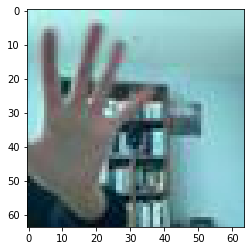

예측확률분포: [0.3055437  0.35007554 0.3443807 ]
라벨: 2, 예측결과: 1


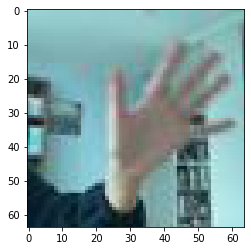

예측확률분포: [0.3055437  0.35007554 0.3443807 ]
라벨: 0, 예측결과: 1


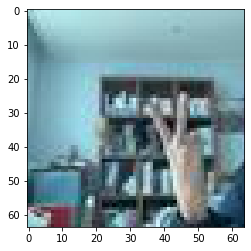

In [16]:
# 오답 확인
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우 append 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개 출력
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

학습 시 accuracy가 낮은 상태로 정체되어 모델 구조 개선이 필요해보입니다.

### attempt #2
- Conv2D, MaxPooling2D 추가
- dense 64 -> 128

In [17]:
# modeling
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'), # 추가된 층
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'), # 뉴런 수 증가
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 128)        

Epoch 1/10
115/115 [==============================] - 32s 270ms/step - loss: 5.8760 - accuracy: 0.3738
Epoch 2/10
115/115 [==============================] - 31s 269ms/step - loss: 1.0343 - accuracy: 0.4510
Epoch 3/10
115/115 [==============================] - 31s 269ms/step - loss: 0.9668 - accuracy: 0.4837
Epoch 4/10
115/115 [==============================] - 31s 269ms/step - loss: 0.9227 - accuracy: 0.5122
Epoch 5/10
115/115 [==============================] - 31s 270ms/step - loss: 0.8481 - accuracy: 0.5653
Epoch 6/10
115/115 [==============================] - 31s 268ms/step - loss: 0.7766 - accuracy: 0.6181
Epoch 7/10
115/115 [==============================] - 31s 269ms/step - loss: 0.7473 - accuracy: 0.6542
Epoch 8/10
115/115 [==============================] - 31s 270ms/step - loss: 0.6381 - accuracy: 0.7261
Epoch 9/10
115/115 [==============================] - 31s 271ms/step - loss: 0.5812 - accuracy: 0.7465
Epoch 10/10
115/115 [==============================] - 31s 268ms/step - l

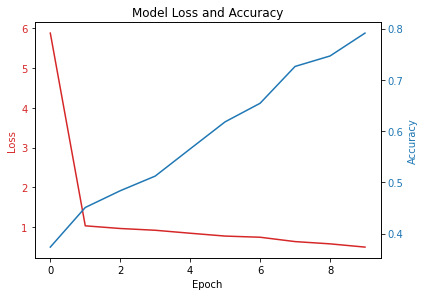

In [18]:
# 모델 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Early Stopping 콜백 설정
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


# 모델 훈련, 훈련 과정의 정보를 history에 저장
history = model.fit(x_train, y_train, epochs=n_train_epoch)


# 시각화
fig, ax1 = plt.subplots() 

color = 'tab:red' 
ax1.set_xlabel('Epoch') 
ax1.set_ylabel('Loss', color=color) 
ax1.plot(history.history['loss'], color=color) 
ax1.tick_params(axis='y', labelcolor=color) 

ax2 = ax1.twinx()  
color = 'tab:blue' 
ax2.set_ylabel('Accuracy', color=color) 
ax2.plot(history.history['accuracy'], color=color) 
ax2.tick_params(axis='y', labelcolor=color) 

fig.tight_layout() 
plt.title('Model Loss and Accuracy')
plt.show() 

In [19]:
# 결과 저장

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
test_losses.append(test_loss)
test_accuracies.append(test_accuracy)

print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

62/62 - 4s - loss: 1.6128 - accuracy: 0.3948
test_loss: 1.6128416061401367 
test_accuracy: 0.3947905898094177


In [20]:
# 결과 값 탐색
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test 탐색 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.42373756 0.05738877 0.51887363]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


예측확률분포: [0.17490156 0.02260524 0.8024933 ]
라벨: 1, 예측결과: 2


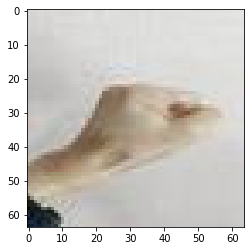

예측확률분포: [0.22944768 0.1274689  0.64308345]
라벨: 1, 예측결과: 2


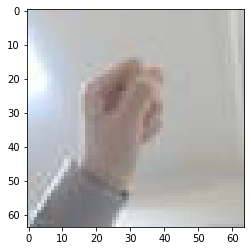

예측확률분포: [0.43885887 0.13052745 0.43061364]
라벨: 2, 예측결과: 0


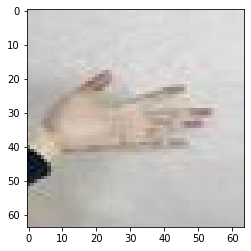

예측확률분포: [0.03346375 0.09053906 0.8759972 ]
라벨: 1, 예측결과: 2


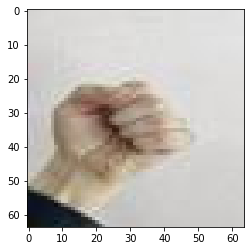

예측확률분포: [2.8419038e-02 3.2116184e-06 9.7157776e-01]
라벨: 0, 예측결과: 2


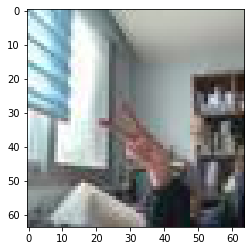

예측확률분포: [7.9001546e-02 1.7421161e-08 9.2099839e-01]
라벨: 0, 예측결과: 2


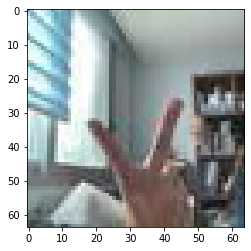

예측확률분포: [9.5926732e-02 7.6707089e-08 9.0407324e-01]
라벨: 0, 예측결과: 2


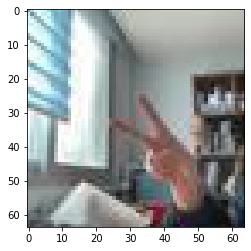

예측확률분포: [0.25279844 0.00438656 0.742815  ]
라벨: 0, 예측결과: 2


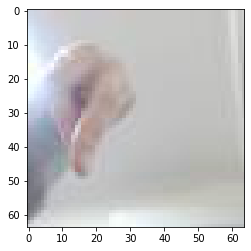

예측확률분포: [0.29988718 0.18811916 0.51199365]
라벨: 0, 예측결과: 2


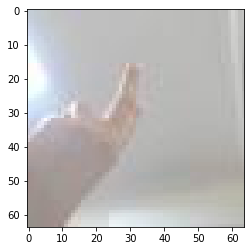

예측확률분포: [8.5725440e-03 2.7975744e-09 9.9142742e-01]
라벨: 0, 예측결과: 2


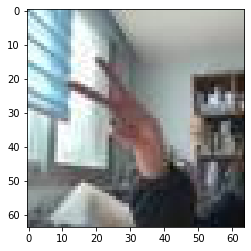

In [21]:
# 오답 확인
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우 append 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개 출력
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

모델 구조를 변경하며 Epoch가 상승함에 따라 accuracy가 점차적으로 높아지며 안정화가 된 것으로 보여집니다. <br/>
test_accuracy: 0.39로 baseline보다 점수가 상승했으나 아직도 과적합이 있는 것으로 보여집니다.

### attempt #3 
- Data Augmentation 추가
- Batch Normalization 추가

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=20, # 회전 범위
    width_shift_range=0.2, # 수평 이동 범위
    height_shift_range=0.2, # 수직 이동 범위
    shear_range=0.2, # 전단 변형 범위
    zoom_range=0.2, # 확대 축소 범위
    horizontal_flip=True, # 수평 뒤집기 적용
    fill_mode='nearest' # 변형 시 채우기 모드
)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(), # 배치 정규화 추가
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(), # 배치 정규화 추가
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.BatchNormalization(), # 배치 정규화 추가
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])



/opt/conda/lib/python3.9/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
114/114 [==============================] - 48s 409ms/step - loss: 1.3054 - accuracy: 0.4948
Epoch 2/10
114/114 [==============================] - 46s 401ms/step - loss: 0.8625 - accuracy: 0.5936
Epoch 3/10
114/114 [==============================] - 46s 401ms/step - loss: 0.7838 - accuracy: 0.6401
Epoch 4/10
114/114 [==============================] - 46s 399ms/step - loss: 0.6998 - accuracy: 0.6847
Epoch 5/10
114/114 [==============================] - 46s 399ms/step - loss: 0.6420 - accuracy: 0.7108
Epoch 6/10
114/114 [==============================] - 46s 400ms/step - loss: 0.6425 - accuracy: 0.7250
Epoch 7/10
114/114 [==============================] - 47s 405ms/step - loss: 0.5794 - accuracy: 0.7565
Epoch 8/10
114/114 [==============================] - 46s 403ms/step - loss: 0.5146 - accuracy: 0.7862
Epoch 9/10
114/114 [==============================] - 46s 401ms/step - loss: 0.5071 - accuracy: 0.7894
Epoch 10/10
114/114 [==============================] - 46s 402ms/step - l

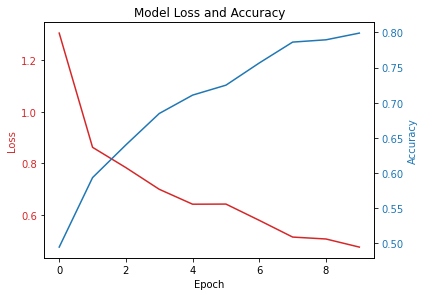

In [23]:
# 모델 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Early Stopping 콜백 설정
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


# 모델 훈련 시 데이터 증강 사용
# .fit 대신 .fit_generator 사용
history = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=len(x_train) / 32,
    epochs=n_train_epoch,
    callbacks=[early_stopping]
)

# 시각화
fig, ax1 = plt.subplots() 

color = 'tab:red' 
ax1.set_xlabel('Epoch') 
ax1.set_ylabel('Loss', color=color) 
ax1.plot(history.history['loss'], color=color) 
ax1.tick_params(axis='y', labelcolor=color) 

ax2 = ax1.twinx()  
color = 'tab:blue' 
ax2.set_ylabel('Accuracy', color=color) 
ax2.plot(history.history['accuracy'], color=color) 
ax2.tick_params(axis='y', labelcolor=color) 

fig.tight_layout() 
plt.title('Model Loss and Accuracy')
plt.show() 

In [24]:
# 결과 저장

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
test_losses.append(test_loss)
test_accuracies.append(test_accuracy)

print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

62/62 - 5s - loss: 4.0030 - accuracy: 0.4893
test_loss: 4.002953052520752 
test_accuracy: 0.4892747700214386


In [25]:
# 결과 값 탐색
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test 탐색 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [6.6085458e-03 9.9339139e-01 1.5862474e-07]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


예측확률분포: [6.0062909e-01 3.9920452e-01 1.6642235e-04]
라벨: 2, 예측결과: 0


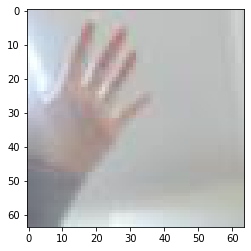

예측확률분포: [1.0473702e-01 8.9522910e-01 3.3944245e-05]
라벨: 0, 예측결과: 1


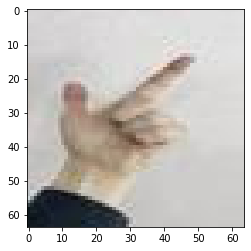

예측확률분포: [3.1092990e-04 9.9968910e-01 4.5982858e-09]
라벨: 2, 예측결과: 1


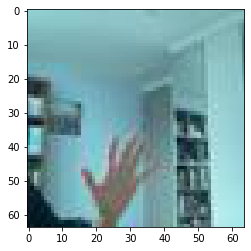

예측확률분포: [2.4245158e-01 7.5750303e-01 4.5407134e-05]
라벨: 2, 예측결과: 1


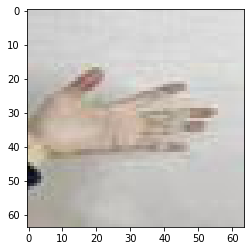

예측확률분포: [5.6499779e-01 4.3484846e-01 1.5378222e-04]
라벨: 2, 예측결과: 0


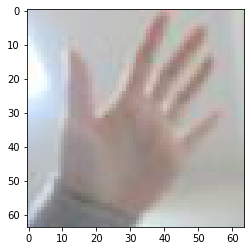

예측확률분포: [6.3947070e-01 3.6040705e-01 1.2222536e-04]
라벨: 2, 예측결과: 0


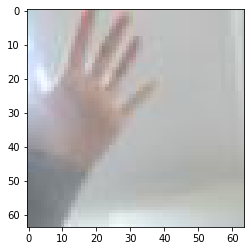

예측확률분포: [1.8369330e-01 8.1629109e-01 1.5584803e-05]
라벨: 0, 예측결과: 1


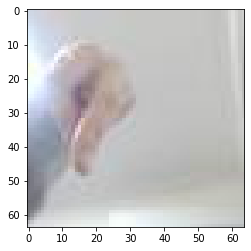

예측확률분포: [9.955635e-01 4.401855e-03 3.463409e-05]
라벨: 2, 예측결과: 0


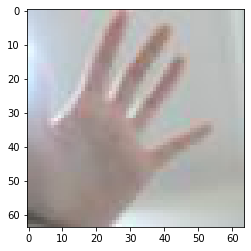

예측확률분포: [3.641537e-01 6.357473e-01 9.898987e-05]
라벨: 2, 예측결과: 1


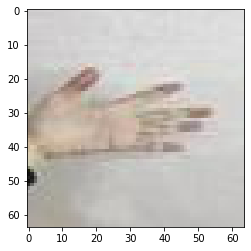

예측확률분포: [1.7880049e-01 8.2107210e-01 1.2744621e-04]
라벨: 2, 예측결과: 1


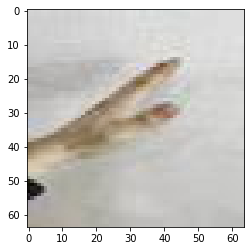

In [26]:
# 오답 확인
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우 append 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개 출력
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

test_accuracy가 0.49로 성능이 많이 상승되었습니다. <br/>
하지만 아직 성능이 좋다고 하긴 어려워 보입니다.

### attempt #4 
- optimizers : Adam(lr=0.0001) (학습률 조정)
- regularizers : L1, L2 (과적합 방지)
- epochs : 10 -> 50
- Model Checkpoint :각 에폭마다 모델의 성능이 개선되었을 때만 모델을 저장

In [27]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 이미지 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=20, # 회전 범위
    width_shift_range=0.2, # 수평 이동 범위
    height_shift_range=0.2, # 수직 이동 범위
    shear_range=0.2, # 전단 변형 범위
    zoom_range=0.2, # 확대 축소 범위
    horizontal_flip=True, # 수평 뒤집기 적용
    fill_mode='nearest' # 변형 시 채우기 모드
)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])



/opt/conda/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/50
114/114 [==============================] - 47s 402ms/step - loss: 1.9006 - accuracy: 0.4464
Epoch 2/50
114/114 [==============================] - 46s 402ms/step - loss: 1.3293 - accuracy: 0.5136
Epoch 3/50
114/114 [==============================] - 46s 398ms/step - loss: 1.1877 - accuracy: 0.5658
Epoch 4/50
114/114 [==============================] - 47s 408ms/step - loss: 1.1024 - accuracy: 0.6064
Epoch 5/50
114/114 [==============================] - 47s 405ms/step - loss: 1.0552 - accuracy: 0.6330
Epoch 6/50
114/114 [==============================] - 47s 404ms/step - loss: 1.0031 - accuracy: 0.6537
Epoch 7/50
114/114 [==============================] - 46s 401ms/step - loss: 0.9635 - accuracy: 0.6646
Epoch 8/50
114/114 [==============================] - 46s 401ms/step - loss: 0.9463 - accuracy: 0.6785
Epoch 9/50
114/114 [==============================] - 47s 406ms/step - loss: 0.9023 - accuracy: 0.7027
Epoch 10/50
114/114 [==============================] - 46s 401ms/step - l

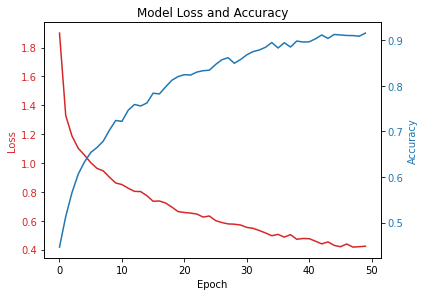

In [28]:
# 모델 컴파일
model.compile(optimizer=Adam(lr=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Early Stopping과 Model Checkpoint 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# 모델 훈련
history = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=len(x_train) / 32,
    epochs=50, # 에폭 수를 늘릴 수 있습니다.
    callbacks=[early_stopping, model_checkpoint]
)

# 시각화
fig, ax1 = plt.subplots() 

color = 'tab:red' 
ax1.set_xlabel('Epoch') 
ax1.set_ylabel('Loss', color=color) 
ax1.plot(history.history['loss'], color=color) 
ax1.tick_params(axis='y', labelcolor=color) 

ax2 = ax1.twinx()  
color = 'tab:blue' 
ax2.set_ylabel('Accuracy', color=color) 
ax2.plot(history.history['accuracy'], color=color) 
ax2.tick_params(axis='y', labelcolor=color) 

fig.tight_layout() 
plt.title('Model Loss and Accuracy')
plt.show() 

In [29]:
# 결과 저장

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
test_losses.append(test_loss)
test_accuracies.append(test_accuracy)

print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

62/62 - 5s - loss: 2.2042 - accuracy: 0.5541
test_loss: 2.2041566371917725 
test_accuracy: 0.5541368722915649


# 회고

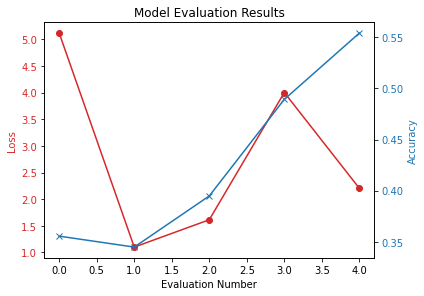

In [30]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Evaluation Number')
ax1.set_ylabel('Loss', color=color)
ax1.plot(test_losses, color=color, marker='o', label='Test Loss')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(test_accuracies, color=color, marker='x', label='Test Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Model Evaluation Results')
plt.show()

손글씨 0,1,2,3,4,5,6,7,8,9를 분류하는 것보다 가위바위보 3가지를 분류해 내는 것이 더 어려울 것이라는 생각은 하지 못했다.<br/>
3명의 손모양을 연속 사진으로 촬영하여 학습하고 다른 3명의 손모양으로 예측을 진행했는데 옷, 배경, 손목의 노출 등 노이즈 요소가 많이 추가되어 데이터 학습량이 부족한 것이 주요 요소가 아니었을까싶다.<br/>
tuning을 진행할 때마다 모델의 성능은 점차 높아졌지만 loss율이 같이 상승했고 과적합이 생각보다 잘 잡히지 않아 결과는 아쉬웠다.<br/>
계속 진행하면 Accuracy는 올릴 수 있을 것 같지만 데이터가 적다보니 일반화가 되는 것이 아닌 test 데이터에만 최적화가 되는 게 아닐까하는 생각이 들어 여러 사람의 데이터를 더 추가한 뒤 튜닝을 진행하는 게 나은 방향이 좋을 것 같아 4번째 시도에서 중지하게 되었지만<br/>
다양한 방법을 시도해보며 모델이 조금씩 튜닝될 때 마다 즉각적인 개선이 보여지는게 흥미로웠다.<br/>

- Image Size :

64 > 128 > 28 순서로 64로 설정했을 때 가장 좋은 성능을 보였다.<br/>
이미지 사이즈가 너무 높아도 오히려 학습에 방해가 될 수 있다는 것을 알았다.

- dense : 

학습 Accuracy 상태가 저조할 때는 뉴런을 증가시키는 것이 효과가 좋았다.

- ImageDataGenerator : 

데이터 과적합 현상이 있을 때 데이터 증강이 일반화 성능을 높일 수 있다는 것을 체감했다.<br/>
ImageDataGenerator 파라미터를 조정하면 더 좋은 성과를 낼 수 있을 것 같다.

- optimizers : Adam(lr=0.0001) :

학습률을 낮추고 Epochs를 늘려 천천히 길게 학습시키는 것이 가장 높은 Accuracy 상승과 Loss의 하락이 눈에 띄는 방법이었다.
다만 regularizers : L1, L2가 함께 진행되어 둘 중 어떤 것 방법에서 더 효과가 높았는지 비교해보지 못해 아쉽다..<br/>
